In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TGraphPolar
from ROOT import gStyle
from array import array
import math

c1 = TCanvas( 'c1', 'The Fit Canvas', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(3,1)

Welcome to JupyROOT 6.18/00


In [2]:
xr = array('d')
yr = array('d')
xt = array('d')
yt = array('d')
xe = array('d')
ye = array('d')
xk = array('d')
yk = array('d')
xp = array('d')
yp = array('d')

Read data from the files and store in the above python arrays.

In [3]:
nf = 0
with open('rplot.txt') as f:
    for line in f:
        nf=nf+1
        data = line.split()
        xr.append(float(data[0]))
        yr.append(float(data[1]))
ng = 0
with open('tplot.txt') as g:
    for line in g:
        ng=ng+1
        data = line.split()
        xt.append(float(data[0]))
        yt.append(float(data[1]))
nd = 0
with open('total.txt') as d:
    for line in d:
        nd=nd+1
        data = line.split()
        xe.append(float(data[0]))
        ye.append(float(data[1]))
nh = 0
with open('kinetic.txt') as h:
    for line in h:
        nh=nh+1
        data = line.split()
        xk.append(float(data[0]))
        yk.append(float(data[1]))
ne = 0
with open('potential.txt') as e:
    for line in e:
        ne=ne+1
        data = line.split()
        xp.append(float(data[0]))
        yp.append(float(data[1]))
    

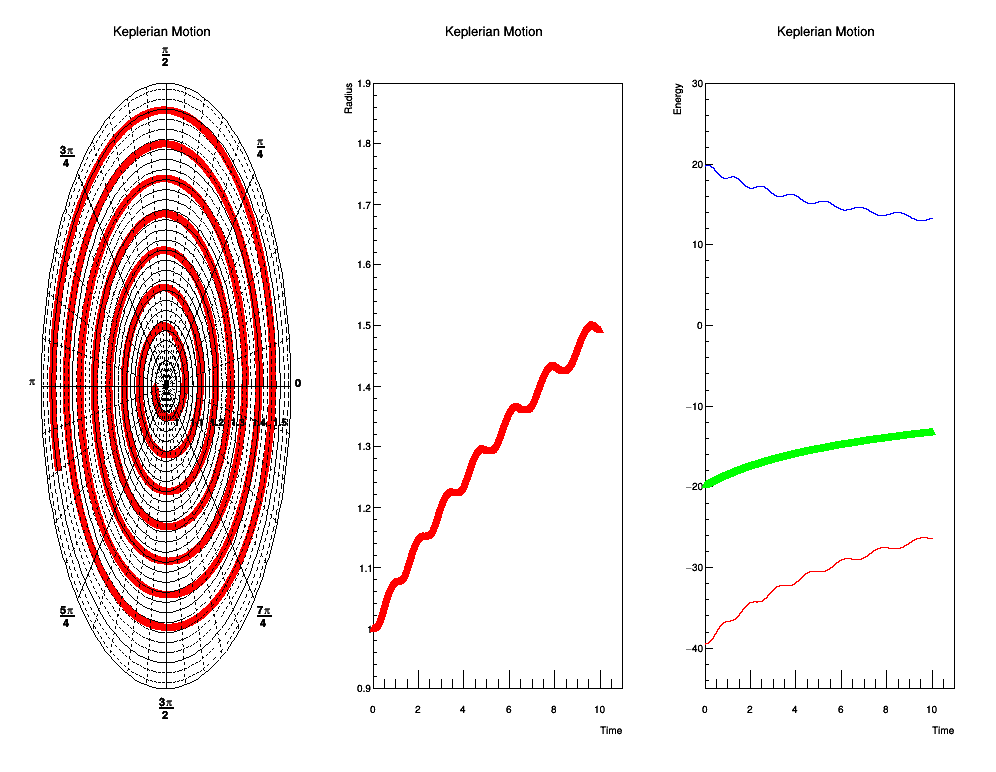

In [5]:
gStyle.SetOptFit(1)

grr = TGraphPolar(nf,xr,yr)
grt = TGraph(ng,xt,yt)
gre = TGraph(nd,xe,ye)
grk = TGraph(nh,xk,yk)
grp = TGraph(ne,xp,yp)
grr.SetMarkerColor(2)
grt.SetMarkerColor(2)
gre.SetMarkerColor(3)
grk.SetMarkerColor(4)
grp.SetMarkerColor(2)

c1.cd(1)
grr.SetMarkerStyle(22)
grr.SetTitle("Keplerian Motion")
grr.GetXaxis().SetTitle("Theta")
grr.GetYaxis().SetTitle("Radius")
grr.SetMaxRadial(1.1)
grr.SetMinRadial(0.9)
grr.Draw("AP")

c1.cd(2)
grt.SetMarkerStyle(22)
grt.SetTitle("Keplerian Motion")
grt.GetXaxis().SetTitle("Time")
grt.GetYaxis().SetTitle("Radius")
grt.GetHistogram().SetMaximum(1.9)
grt.GetHistogram().SetMinimum(0.9)
grt.Draw("AP")

c1.cd(3)
gre.SetMarkerStyle(22)
gre.SetTitle("Keplerian Motion")
gre.GetXaxis().SetTitle("Time")
gre.GetYaxis().SetTitle("Energy")
gre.GetHistogram().SetMaximum(30.0)
gre.GetHistogram().SetMinimum(-45.0)
gre.Draw("AP")
grk.Draw("P")
grp.Draw("P")
c1.Draw()